In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load files
data_path = '/content/drive/MyDrive/CSCI461/'
train = pd.read_csv(data_path + 'Train.csv')
test = pd.read_csv(data_path + 'Test.csv')
y = train['Yield']
train = train.drop(['Yield'], axis=1)
combined_data = pd.concat([train,test],axis=0)

In [4]:
print((train.isnull().sum()/3870)*100)
df_missing = (train.isnull().sum()/3870)*100
#print('total null values = ',train.isnull().sum().sum())
#len(train)
#print(len(train), len(test), len(combined_data))

ID                                     0.000000
District                               0.000000
Block                                  0.000000
CultLand                               0.000000
CropCultLand                           0.000000
LandPreparationMethod                  0.000000
CropTillageDate                        0.000000
CropTillageDepth                       0.000000
CropEstMethod                          0.000000
RcNursEstDate                          2.144703
SeedingSowingTransplanting             0.000000
SeedlingsPerPit                        7.467700
NursDetFactor                          7.467700
TransDetFactor                         7.467700
TransplantingIrrigationHours           4.987080
TransplantingIrrigationSource          2.971576
TransplantingIrrigationPowerSource    12.997416
TransIrriCost                         22.790698
StandingWater                          6.149871
OrgFertilizers                        34.496124
Ganaura                               62

In [5]:
missing_values_percentage = (train.isnull().sum() / 3870) * 100

# Filter columns with missing values
missing_values_columns = missing_values_percentage[missing_values_percentage > 0]

# Create a DataFrame with column names and missing values
missing_values_df = pd.DataFrame({
    'Column_Name': missing_values_columns.index,
    'Missing_Percentage': missing_values_columns.values
})

# Save the DataFrame to a CSV file
missing_values_df['Missing_Percentage'] = missing_values_df['Missing_Percentage'].round(2)

# Sort the DataFrame in descending order
missing_values_df = missing_values_df.sort_values(by='Missing_Percentage', ascending=False)

# Save the DataFrame to a CSV file
missing_values_df.to_csv('missing_values_report.csv', index=False)

# Data-Preprocessing

In [6]:
train.shape
train = combined_data

In [7]:
from datetime import datetime

# Assuming you have a DataFrame 'df' with a 'CropTillageDate' column
# Convert the 'CropTillageDate' column to datetime objects
train['CropTillageDate'] = pd.to_datetime(train['CropTillageDate'], format='%Y-%m-%d')
train['RcNursEstDate'] = pd.to_datetime(train['RcNursEstDate'], format='%Y-%m-%d')
train['SeedingSowingTransplanting'] = pd.to_datetime(train['SeedingSowingTransplanting'], format='%Y-%m-%d')
train['Harv_date'] = pd.to_datetime(train['Harv_date'], format='%Y-%m-%d')
train['Threshing_date'] = pd.to_datetime(train['Threshing_date'], format='%Y-%m-%d')

# Calculate the difference between each date and today
today = datetime.today()
train['DaysSinceCropTillage'] = (today - train['CropTillageDate']).dt.days
train['DaysSinceRcNursEst'] = (today - train['RcNursEstDate']).dt.days
train['DaysSinceSeedingSowingTransplanting'] = (today - train['SeedingSowingTransplanting']).dt.days
train['DaysSinceHarvest'] = (today - train['Harv_date']).dt.days
train['DaysSinceThreshing'] = (today - train['Threshing_date']).dt.days

train = train.drop(columns = ['CropTillageDate', 'RcNursEstDate', 'SeedingSowingTransplanting', 'Harv_date', 'Threshing_date' ])
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDepth,CropEstMethod,SeedlingsPerPit,NursDetFactor,...,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,DaysSinceCropTillage,DaysSinceRcNursEst,DaysSinceSeedingSowingTransplanting,DaysSinceHarvest,DaysSinceThreshing
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,5,Manual_PuddledRandom,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,...,machine,30,40,plowed_in_soil,0.312500,509,532.0,508,390,390
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,5,Manual_PuddledRandom,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,...,machine,24,10,plowed_in_soil,0.312500,511,539.0,509,381,352
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,6,Manual_PuddledRandom,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,...,machine,30,10,plowed_in_soil,0.148148,529,539.0,485,364,334
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,6,Manual_PuddledRandom,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,...,hand,26,10,plowed_in_soil,0.222222,543,542.0,512,374,347
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,4,Manual_PuddledRandom,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,...,machine,24,40,plowed_in_soil,0.468750,510,538.0,509,376,374


In [8]:
print('total null values = ',train.isnull().sum().sum())

total null values =  27657


In [9]:
train['Stubble_use_encoded'] = train['Stubble_use'].replace({'plowed_in_soil': 0, 'burned': 1})
train = train.drop(columns=['Stubble_use'])

In [10]:
train['Harv_method_encoded'] = train['Harv_method'].replace({'machine': 0, 'hand': 1})
train = train.drop(columns=['Harv_method'])
train['Threshing_method_encoded'] = train['Threshing_method'].replace({'machine': 0, 'hand': 1})
train = train.drop(columns=['Threshing_method'])

In [11]:
train['NursDetFactor_encoded_CalendarDate'] = train['NursDetFactor'].str.contains('CalendarDate')
train['NursDetFactor_encoded_CalendarDate'] = train['NursDetFactor_encoded_CalendarDate'].fillna(False)

train['NursDetFactor_encoded_PreMonsoonShowers'] = train['NursDetFactor'].str.contains('PreMonsoonShowers')
train['NursDetFactor_encoded_PreMonsoonShowers'] = train['NursDetFactor_encoded_PreMonsoonShowers'].fillna(False)

train['NursDetFactor_encoded_IrrigWaterAvailability'] = train['NursDetFactor'].str.contains('IrrigWaterAvailability')
train['NursDetFactor_encoded_IrrigWaterAvailability'] = train['NursDetFactor_encoded_IrrigWaterAvailability'].fillna(False)

train['NursDetFactor_encoded_LabourAvailability'] = train['NursDetFactor'].str.contains('LabourAvailability')
train['NursDetFactor_encoded_LabourAvailability'] = train['NursDetFactor_encoded_LabourAvailability'].fillna(False)

train['NursDetFactor_encoded_SeedAvailability'] = train['NursDetFactor'].str.contains('SeedAvailability')
train['NursDetFactor_encoded_SeedAvailability'] = train['NursDetFactor_encoded_SeedAvailability'].fillna(False)

train = train.drop(columns=['NursDetFactor'])

In [12]:
print('total null values = ',train.isnull().sum().sum())

total null values =  27265


In [13]:
train['CropbasalFerts_encoded_DAP'] = train['CropbasalFerts'].str.contains('DAP')
train['CropbasalFerts_encoded_DAP'] = train['CropbasalFerts_encoded_DAP'].fillna(False)

train['CropbasalFerts_encoded_Urea'] = train['CropbasalFerts'].str.contains('Urea')
train['CropbasalFerts_encoded_Urea'] = train['CropbasalFerts_encoded_Urea'].fillna(False)

train['CropbasalFerts_encoded_Other'] = train['CropbasalFerts'].str.contains('Other')
train['CropbasalFerts_encoded_Other'] = train['CropbasalFerts_encoded_Other'].fillna(False)

train['CropbasalFerts_encoded_SSP'] = train['CropbasalFerts'].str.contains('SSP')
train['CropbasalFerts_encoded_SSP'] = train['CropbasalFerts_encoded_SSP'].fillna(False)

train['CropbasalFerts_encoded_NPK'] = train['CropbasalFerts'].str.contains('NPK')
train['CropbasalFerts_encoded_NPK'] = train['CropbasalFerts_encoded_NPK'].fillna(False)

train['CropbasalFerts_encoded_MoP'] = train['CropbasalFerts'].str.contains('MoP')
train['CropbasalFerts_encoded_MoP'] = train['CropbasalFerts_encoded_MoP'].fillna(False)

train = train.drop(columns=['CropbasalFerts'])

In [14]:
train['FirstTopDressFert_encoded_DAP'] = train['FirstTopDressFert'].str.contains('DAP')
train['FirstTopDressFert_encoded_DAP'] = train['FirstTopDressFert_encoded_DAP'].fillna(False)

train['FirstTopDressFert_encoded_Urea'] = train['FirstTopDressFert'].str.contains('Urea')
train['FirstTopDressFert_encoded_Urea'] = train['FirstTopDressFert_encoded_Urea'].fillna(False)

train['FirstTopDressFert_encoded_Other'] = train['FirstTopDressFert'].str.contains('Other')
train['FirstTopDressFert_encoded_Other'] = train['FirstTopDressFert_encoded_Other'].fillna(False)

train['FirstTopDressFert_encoded_SSP'] = train['FirstTopDressFert'].str.contains('SSP')
train['FirstTopDressFert_encoded_SSP'] = train['FirstTopDressFert_encoded_SSP'].fillna(False)

train['FirstTopDressFert_encoded_NPK'] = train['FirstTopDressFert'].str.contains('NPK')
train['FirstTopDressFert_encoded_NPK'] = train['FirstTopDressFert_encoded_NPK'].fillna(False)

train = train.drop(columns=['FirstTopDressFert'])

In [15]:
train['LandPreparationMethod_encoded_TractorPlough'] = train['LandPreparationMethod'].str.contains('TractorPlough')
train['LandPreparationMethod_encoded_TractorPlough'] = train['LandPreparationMethod_encoded_TractorPlough'].fillna(False)

train['LandPreparationMethod_encoded_FourWheelTracRotavator'] = train['LandPreparationMethod'].str.contains('FourWheelTracRotavator')
train['LandPreparationMethod_encoded_FourWheelTracRotavator'] = train['LandPreparationMethod_encoded_FourWheelTracRotavator'].fillna(False)

train['LandPreparationMethod_encoded_WetTillagePuddling'] = train['LandPreparationMethod'].str.contains('WetTillagePuddling')
train['LandPreparationMethod_encoded_WetTillagePuddling'] = train['LandPreparationMethod_encoded_WetTillagePuddling'].fillna(False)

train['LandPreparationMethod_encoded_BullockPlough'] = train['LandPreparationMethod'].str.contains('BullockPlough')
train['LandPreparationMethod_encoded_BullockPlough'] = train['LandPreparationMethod_encoded_BullockPlough'].fillna(False)

train['LandPreparationMethod_encoded_OtherLandPrepMethod'] = train['LandPreparationMethod'].str.contains('Other')
train['LandPreparationMethod_encoded_OtherLandPrepMethod'] = train['LandPreparationMethod_encoded_OtherLandPrepMethod'].fillna(False)

train = train.drop(columns=['LandPreparationMethod'])

In [16]:
train['TransDetFactor_encoded_CalendarDate'] = train['TransDetFactor'].str.contains('CalendarDate')
train['TransDetFactor_encoded_CalendarDate'] = train['TransDetFactor_encoded_CalendarDate'].fillna(False)

train['TransDetFactor_encoded_SeedlingAge'] = train['TransDetFactor'].str.contains('SeedlingAge')
train['TransDetFactor_encoded_SeedlingAge'] = train['TransDetFactor_encoded_SeedlingAge'].fillna(False)

train['TransDetFactor_encoded_RainArrival'] = train['TransDetFactor'].str.contains('RainArrival')
train['TransDetFactor_encoded_RainArrival'] = train['TransDetFactor_encoded_RainArrival'].fillna(False)

train['TransDetFactor_encoded_LabourAvailability'] = train['TransDetFactor'].str.contains('LabourAvailability')
train['TransDetFactor_encoded_LabourAvailability'] = train['TransDetFactor_encoded_LabourAvailability'].fillna(False)

train['TransDetFactor_encoded_IrrigWaterAvailability'] = train['TransDetFactor'].str.contains('IrrigWaterAvailability')
train['TransDetFactor_encoded_IrrigWaterAvailability'] = train['TransDetFactor_encoded_IrrigWaterAvailability'].fillna(False)

train = train.drop(columns=['TransDetFactor'])

In [17]:
train = pd.get_dummies(train, columns=['District','CropEstMethod','PCropSolidOrgFertAppMethod', 'MineralFertAppMethod', 'MineralFertAppMethod.1','TransplantingIrrigationSource','TransplantingIrrigationPowerSource'], prefix=['District_encoded','CropEstMethod_encoded','PCropSolidOrgFertAppMethod_encoded','MineralFertAppMethod_encoded','MineralFertAppMethod.1_encoded','TransplantingIrrigationSource_encoded','TransplantingIrrigationPowerSource_encoded'])
# remove all false tue by multiplying by 1
train = train*1

In [18]:
train.describe()

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,...,MineralFertAppMethod.1_encoded_SoilApplied,TransplantingIrrigationSource_encoded_Boring,TransplantingIrrigationSource_encoded_Canal,TransplantingIrrigationSource_encoded_Pond,TransplantingIrrigationSource_encoded_Rainfed,TransplantingIrrigationSource_encoded_TubeWell,TransplantingIrrigationSource_encoded_Well,TransplantingIrrigationPowerSource_encoded_Diesel,TransplantingIrrigationPowerSource_encoded_Electric,TransplantingIrrigationPowerSource_encoded_Solar
count,5160.000000,5160.000000,5160.000000,4768.000000,4890.000000,3961.000000,4843.000000,1948.000000,1618.000000,5160.000000,...,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000
mean,28.695736,24.929845,4.474806,2.679530,8.100613,385.939662,3.252529,29.366016,62.481459,2.191667,...,0.016085,0.832946,0.095736,0.008915,0.027132,0.003488,0.000581,0.185465,0.683527,0.000388
std,29.108989,26.896197,1.134895,6.686518,41.311969,424.943656,2.215476,121.052018,340.507710,0.634268,...,0.125816,0.373060,0.294258,0.094005,0.162483,0.058965,0.024107,0.388712,0.465145,0.019686
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,10.000000,4.000000,2.000000,2.000000,150.000000,2.000000,1.000000,1.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,20.000000,4.000000,2.000000,4.000000,250.000000,3.000000,3.000000,2.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,36.000000,30.000000,5.000000,3.000000,6.000000,450.000000,4.000000,4.000000,5.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,800.000000,800.000000,8.000000,442.000000,2000.000000,6000.000000,20.000000,1400.000000,4000.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Handling Outliers

In [19]:
def cap_outliers(column):
    mean = column.mean()
    std_dev = column.std()
    lower_limit = mean - 3 * std_dev
    upper_limit = mean + 3 * std_dev

    # Count and cap values outside the specified range
    outliers_count = ((column < lower_limit) | (column > upper_limit)).sum()
    column[column < lower_limit] = lower_limit
    column[column > upper_limit] = upper_limit

    return outliers_count

In [20]:
outliers_count_dict = {}

# Loop through each column in the DataFrame
for col in train.columns:
    # Check if the column contains numerical data
    if(col == 'Yield'):
      continue
    if pd.api.types.is_numeric_dtype(train[col]):
        # Identify and cap outliers, and store the count in the dictionary
        outliers_count_dict[col] = cap_outliers(train[col])

# Now, 'train' DataFrame has outliers capped for each column
# 'outliers_count_dict' contains the number of outliers for each column
print(outliers_count_dict)

<ipython-input-19-40f2e61627e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column < lower_limit] = lower_limit
<ipython-input-19-40f2e61627e6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > upper_limit] = upper_limit
<ipython-input-19-40f2e61627e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column < lower_limit] = lower_limit
<ipython-input-19-40f2e61627e6>:10: SettingWithCopyWarning: 
A val

{'CultLand': 62, 'CropCultLand': 50, 'CropTillageDepth': 104, 'SeedlingsPerPit': 1, 'TransplantingIrrigationHours': 54, 'TransIrriCost': 93, 'StandingWater': 163, 'Ganaura': 82, 'CropOrgFYM': 47, 'NoFertilizerAppln': 0, 'BasalDAP': 100, 'BasalUrea': 69, '1tdUrea': 98, '1appDaysUrea': 20, '2tdUrea': 20, '2appDaysUrea': 20, 'Harv_hand_rent': 12, 'Residue_length': 48, 'Residue_perc': 295, 'Acre': 92, 'DaysSinceCropTillage': 4, 'DaysSinceRcNursEst': 0, 'DaysSinceSeedingSowingTransplanting': 13, 'DaysSinceHarvest': 19, 'DaysSinceThreshing': 0, 'Stubble_use_encoded': 27, 'Harv_method_encoded': 295, 'Threshing_method_encoded': 0, 'NursDetFactor_encoded_CalendarDate': 0, 'NursDetFactor_encoded_PreMonsoonShowers': 0, 'NursDetFactor_encoded_IrrigWaterAvailability': 0, 'NursDetFactor_encoded_LabourAvailability': 0, 'NursDetFactor_encoded_SeedAvailability': 0, 'CropbasalFerts_encoded_DAP': 0, 'CropbasalFerts_encoded_Urea': 0, 'CropbasalFerts_encoded_Other': 96, 'CropbasalFerts_encoded_SSP': 95, 'C

<ipython-input-19-40f2e61627e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column < lower_limit] = lower_limit
<ipython-input-19-40f2e61627e6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > upper_limit] = upper_limit
<ipython-input-19-40f2e61627e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column < lower_limit] = lower_limit
<ipython-input-19-40f2e61627e6>:10: SettingWithCopyWarning: 
A val

In [21]:
missing_percentage = train.isnull().sum().sort_values(ascending=False) / train.shape[0]

# Filter out non-zero values
non_zero_missing_percentage = missing_percentage[missing_percentage != 0]

# Print the non-zero missing values
print(non_zero_missing_percentage)

2appDaysUrea                    0.694186
2tdUrea                         0.691667
CropOrgFYM                      0.686434
Ganaura                         0.622481
BasalUrea                       0.440891
OrgFertilizers                  0.339147
TransIrriCost                   0.232364
BasalDAP                        0.142248
1appDaysUrea                    0.142248
1tdUrea                         0.142054
SeedlingsPerPit                 0.075969
Harv_hand_rent                  0.062984
StandingWater                   0.061434
TransplantingIrrigationHours    0.052326
DaysSinceRcNursEst              0.024419
dtype: float64


## dropping columns that have more than 30% missing values

In [22]:

threshold = 0.3
train_cleaned = train.drop(missing_percentage[missing_percentage > threshold].index, axis=1)

missing_percentage = train_cleaned.isnull().sum().sort_values(ascending=False) / train.shape[0]

# Filter out non-zero values
non_zero_missing_percentage = missing_percentage[missing_percentage != 0]

# Print the non-zero missing values
print(non_zero_missing_percentage)

TransIrriCost                   0.232364
BasalDAP                        0.142248
1appDaysUrea                    0.142248
1tdUrea                         0.142054
SeedlingsPerPit                 0.075969
Harv_hand_rent                  0.062984
StandingWater                   0.061434
TransplantingIrrigationHours    0.052326
DaysSinceRcNursEst              0.024419
dtype: float64


In [23]:
selected_columns = [
    "TransIrriCost",
    "1tdUrea",
    "1appDaysUrea",
    "BasalDAP",
    "SeedlingsPerPit",
    "Harv_hand_rent",
    "StandingWater",
    "TransplantingIrrigationHours",
    "DaysSinceRcNursEst"
]

# Print the selected columns
print(train_cleaned[selected_columns].head())

   TransIrriCost  1tdUrea  1appDaysUrea  BasalDAP  SeedlingsPerPit  \
0          200.0     15.0     18.000000       NaN              2.0   
1          125.0     20.0     39.000000      15.0              2.0   
2           80.0      5.0     64.226558       4.0              2.0   
3            NaN      5.0      5.000000       6.0              2.0   
4          300.0     30.0     26.000000      15.0              2.0   

   Harv_hand_rent  StandingWater  TransplantingIrrigationHours  \
0             NaN            2.0                           5.0   
1             3.0            3.0                           5.0   
2           480.0            2.0                           4.0   
3           240.0            NaN                           NaN   
4             NaN            2.0                           9.0   

   DaysSinceRcNursEst  
0               532.0  
1               539.0  
2               539.0  
3               542.0  
4               538.0  


In [24]:
# apply mean to - TransIrriCost, SeedlingsPerPit, TransplantingIrrigationHours
# apply 0 to - 1tdUrea, 1appDaysUrea
# apply mode to - BasalDAP, Harv_hand_rent, StandingWater, DaysSinceRcNursEst

from sklearn.impute import SimpleImputer

columns_to_impute = ['1tdUrea', '1appDaysUrea']
imputer_constant = SimpleImputer(strategy='constant', fill_value=0)
train_cleaned[columns_to_impute] = imputer_constant.fit_transform(train_cleaned[columns_to_impute])

columns_to_impute = {
    "TransIrriCost": "mean",
    "BasalDAP": "most_frequent",
    "SeedlingsPerPit": "mean",
    "Harv_hand_rent": "most_frequent",
    "StandingWater": "most_frequent",
    "TransplantingIrrigationHours": "mean",
    "DaysSinceRcNursEst": "most_frequent"
}

for column, strategy in columns_to_impute.items():
    imputer = SimpleImputer(strategy=strategy)
    train_cleaned[column] = imputer.fit_transform(train_cleaned[[column]])

print(train_cleaned.isnull().sum().sum())


0


# Solving Stratergy

SMOGN: Synthetically generate more data

In [25]:
!pip install smogn

In [26]:
train_cleaned.dtypes

for col in train_cleaned.columns:
  if(train_cleaned[col].dtype == np.uint8):
    print(train_cleaned[col].dtype, col)
    train_cleaned[col] = train_cleaned[col].astype(float)
    print(train_cleaned[col].dtype, col)

uint8 District_encoded_Gaya
float64 District_encoded_Gaya
uint8 District_encoded_Jamui
float64 District_encoded_Jamui
uint8 District_encoded_Nalanda
float64 District_encoded_Nalanda
uint8 District_encoded_Vaishali
float64 District_encoded_Vaishali
uint8 CropEstMethod_encoded_Manual_PuddledRandom
float64 CropEstMethod_encoded_Manual_PuddledRandom
uint8 PCropSolidOrgFertAppMethod_encoded_Broadcasting
float64 PCropSolidOrgFertAppMethod_encoded_Broadcasting
uint8 PCropSolidOrgFertAppMethod_encoded_SoilApplied
float64 PCropSolidOrgFertAppMethod_encoded_SoilApplied
uint8 MineralFertAppMethod_encoded_Broadcasting
float64 MineralFertAppMethod_encoded_Broadcasting
uint8 MineralFertAppMethod_encoded_SoilApplied
float64 MineralFertAppMethod_encoded_SoilApplied
uint8 MineralFertAppMethod.1_encoded_Broadcasting
float64 MineralFertAppMethod.1_encoded_Broadcasting
uint8 TransplantingIrrigationSource_encoded_Boring
float64 TransplantingIrrigationSource_encoded_Boring
uint8 TransplantingIrrigationPower

In [27]:
train_cleaned.shape

(5160, 79)

In [28]:
test = train_cleaned.iloc[3870:, :]
train_new = train_cleaned.iloc[:3870, :]
train_new = pd.concat([train_new, y],axis=1)
print(test.shape, train_new.shape)

(1290, 79) (3870, 80)


In [31]:
train_new.to_csv('/content/drive/MyDrive/CSCI461/train_cleaned.csv', index = False)

Root Mean Squared Error: 469.6437660594045
Feature Importance:
CultLand: 423.0
Acre: 316.0
DaysSinceCropTillage: 270.0
TransIrriCost: 213.0
TransplantingIrrigationHours: 199.0
Harv_hand_rent: 199.0
DaysSinceRcNursEst: 187.0
DaysSinceThreshing: 175.0
CropCultLand: 173.0
DaysSinceHarvest: 173.0
BasalDAP: 168.0
DaysSinceSeedingSowingTransplanting: 162.0
1appDaysUrea: 133.0
1tdUrea: 130.0
SeedlingsPerPit: 127.0
Residue_length: 118.0
CropTillageDepth: 117.0
StandingWater: 88.0
TransDetFactor_encoded_CalendarDate: 33.0
PCropSolidOrgFertAppMethod_encoded_SoilApplied: 26.0
MineralFertAppMethod_encoded_Broadcasting: 25.0
NursDetFactor_encoded_IrrigWaterAvailability: 21.0
NursDetFactor_encoded_LabourAvailability: 19.0
PCropSolidOrgFertAppMethod_encoded_Broadcasting: 19.0
TransDetFactor_encoded_RainArrival: 17.0
CropbasalFerts_encoded_Urea: 16.0
MineralFertAppMethod.1_encoded_RootApplication: 16.0
FirstTopDressFert_encoded_DAP: 14.0
NursDetFactor_encoded_PreMonsoonShowers: 13.0
CropEstMethod_enco

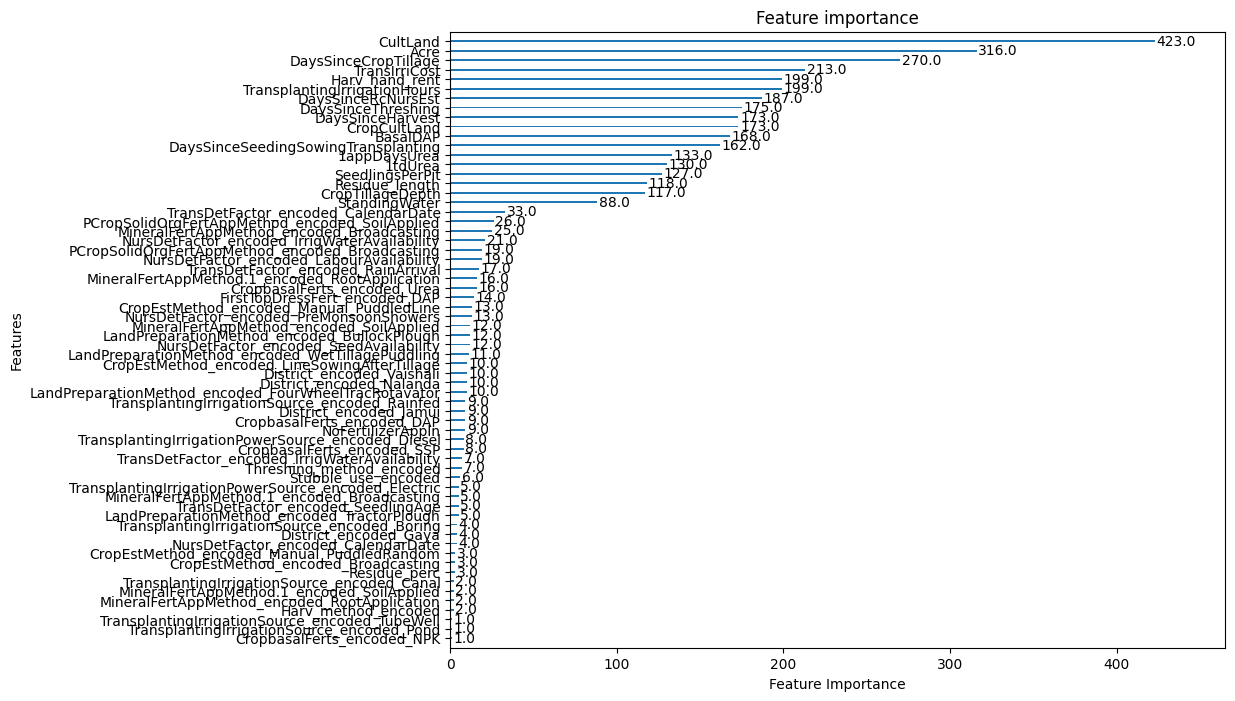

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'X' containing features and a Series 'y' containing regression targets
# Replace this with your actual data
# X = ...
# y = ...
X = train_new.drop(['Yield'], axis=1)
X = X.select_dtypes(include=np.number)
y = train_new['Yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

#xgboost_best = xgb.XGBRegressor(reg_alpha=xgboost.best_params_['reg_alpha'],n_estimators=xgboost.best_params_['n_estimators'])

# Define the XGBoost parameters
params = {
    'reg_alpha':10,
    'objective': 'reg:squarederror',  # for regression tasks
    'eval_metric': 'rmse',  # root mean squared error
    'eta': 0.1,  # learning rate
    'max_depth': 6,  # maximum depth of a tree
    'subsample': 0.8,  # fraction of samples used for fitting the trees
    'colsample_bytree': 0.8,  # fraction of features used for fitting the trees
    'seed': 42  # for reproducibility
}

# Train the XGBoost model
num_round = 100  # number of boosting rounds
model = xgb.train(params, dtrain, num_round)

y_pred = model.predict(dtest)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred, squared = False)
print(f"Root Mean Squared Error: {mse}")

# Get feature importance using get_fscore method
feature_importance = model.get_fscore()

# Display feature importance
print("Feature Importance:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

# Plot feature importance

plt.figure(figsize=(10, 8))  # Adjust the figure size
xgb.plot_importance(model, importance_type='weight', xlabel='Feature Importance', ylabel='Features', ax=plt.gca(), grid=False)
plt.show()

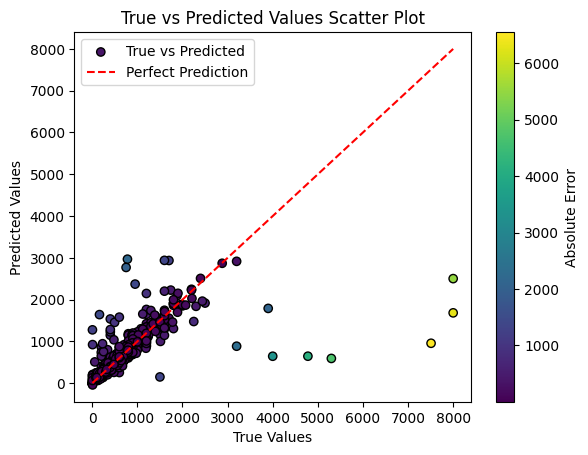

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example true and predicted values
y_true = y_test
y_pred = y_pred

# Calculate the absolute error for each point
errors = np.abs(y_true - y_pred)

# Create a scatter plot with colors based on error
scatter = plt.scatter(y_true, y_pred, c=errors, cmap='viridis', edgecolor='k', label='True vs Predicted')

# Add labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values Scatter Plot')

# Add a diagonal line for reference
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle='--', color='red', label='Perfect Prediction')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Absolute Error')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
test = test.select_dtypes(include=np.number)
dtest = xgb.DMatrix(test)
final_preds = model.predict(dtest)
final_preds

array([570.78503, 396.52423, 459.83347, ..., 233.72374, 375.8976 ,
       328.3871 ], dtype=float32)

In [ ]:
df_preds = pd.DataFrame(final_preds, columns=['Predictions'])
test_id = pd.read_csv(data_path + 'Test.csv')
test_id = test_id['ID']
df_preds = pd.concat([test_id,df_preds], axis=1)
df_preds.head()
df_preds.to_csv('/content/drive/MyDrive/CSCI461/submission4_KM_XGB_no_SMOGN.csv', index = False)

In [29]:
for col in train_new:
  if(train_new[col].dtype == np.uint8):
    print(train_new[col].dtype, col)
    train_new[col] = train_new[col].astype(float)
    print(train_new[col].dtype, col)

In [30]:
import smogn
#pd.concat([X_combined, y], axis=1)
data = train_new.drop(['ID'], axis=1)
#test = test.drop(['ID'], axis=1)

data_smogn = smogn.smoter(

    ## main arguments
    data = data,           ## pandas dataframe
    y = 'Yield',          ## string ('header name')
    k = 5,                    ## positive integer (k < n)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    rel_thres = 0.80,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 2.25
)

r_index: 100%|##########| 25/25 [00:00<00:00, 99.79it/s] 


In [31]:
data_smogn.shape

(6875, 79)

In [32]:
yield3k_count = data_smogn[data_smogn['Yield'] > 3000].shape[0]
yield3k_count

317

# Random Forest

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Split data for training and local testing
X = data_smogn.drop(['Yield', 'CultLand'], axis=1)
X = X.select_dtypes(include=np.number)
y = data_smogn['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Instantiate model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Cross-validation with RMSE and R2 as scoring metrics
cv_rmse = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(rmse))
cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Print RMSE for each fold
print("RMSE for each fold:", cv_rmse)
# Calculate mean RMSE across all folds
mean_rmse = np.mean(cv_rmse)
print("Mean RMSE:", mean_rmse)

# Print R2 for each fold
print("R2 for each fold:", cv_r2)
# Calculate mean R2 across all folds
mean_r2 = np.mean(cv_r2)
print("Mean R2:", mean_r2)

RMSE for each fold: [502.70699876 446.10957447 431.34664298 341.3211116  454.51043461]
Mean RMSE: 435.19895248315663
R2 for each fold: [0.87018868 0.89506175 0.9049645  0.94055754 0.90179809]
Mean R2: 0.9025141111240564


In [34]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Split data for training and local testing
X = data_smogn.drop(['Yield', 'CultLand'], axis=1)
X = X.select_dtypes(include=np.number)
y = data_smogn['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


model = RandomForestRegressor(n_estimators=200, random_state=42)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Measure model performance
rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
print("RF RMSE:", rmse_rf)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RF RMSE: 501.5587025466329
R2 Score: 0.8590094476327281


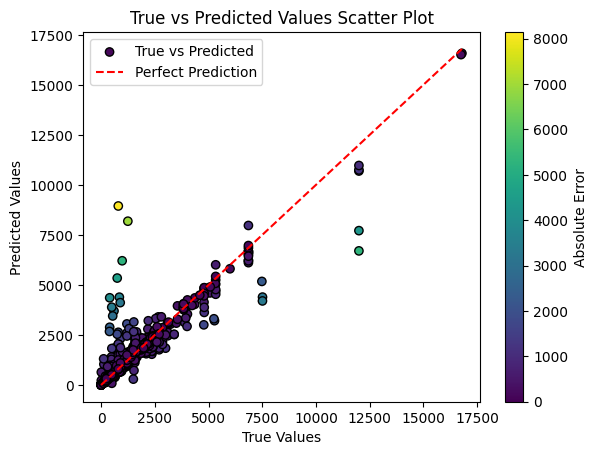

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Example true and predicted values
y_true = y_test
y_pred = y_pred

# Calculate the absolute error for each point
errors = np.abs(y_true - y_pred)

# Create a scatter plot with colors based on error
scatter = plt.scatter(y_true, y_pred, c=errors, cmap='viridis', edgecolor='k', label='True vs Predicted')

# Add labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values Scatter Plot')

# Add a diagonal line for reference
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle='--', color='red', label='Perfect Prediction')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Absolute Error')

# Add a legend
plt.legend()

# Show the plot
plt.show()


# XGBoost

In [41]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
import numpy as np

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Split data for training and local testing
X = data_smogn.drop(['Yield', 'CultLand'], axis=1)
X = X.select_dtypes(include=np.number)
y = data_smogn['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Instantiate XGBoost model
model_xgb = xgb.XGBRegressor(random_state=42)

# Cross-validation with RMSE and R2 as scoring metrics
cv_rmse = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring=make_scorer(rmse))
cv_r2 = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='r2')

# Print RMSE for each fold
print("XGBoost RMSE for each fold:", cv_rmse)
# Calculate mean RMSE across all folds
mean_rmse = np.mean(cv_rmse)
print("XGBoost Mean RMSE:", mean_rmse)

# Print R2 for each fold
print("XGBoost R2 for each fold:", cv_r2)
# Calculate mean R2 across all folds
mean_r2 = np.mean(cv_r2)
print("XGBoost Mean R2:", mean_r2)


XGBoost RMSE for each fold: [552.78533657 557.26902047 392.15449672 372.66434692 542.2354142 ]
XGBoost Mean RMSE: 483.4217229774816
XGBoost R2 for each fold: [0.84303756 0.8362503  0.92144978 0.92913918 0.86023192]
XGBoost Mean R2: 0.8780217479114821


In [42]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Split data for training and local testing
X = data_smogn.drop(['Yield', 'CultLand'], axis=1)
X = X.select_dtypes(include=np.number)
y = data_smogn['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



# Instantiate XGBoost model
model_xgb = xgb.XGBRegressor(random_state=42)

# Fit model
model_xgb.fit(X_train, y_train)

# Make predictions
preds_xgb = model_xgb.predict(X_test)

# Measure model performance
rmse_xgb = mean_squared_error(y_test, preds_xgb, squared=False)
print("XGBoost RMSE:", rmse_xgb)
r2 = r2_score(y_test, preds_xgb)
print("R2 Score:", r2)

XGBoost RMSE: 579.9902661940064
R2 Score: 0.811466781536931


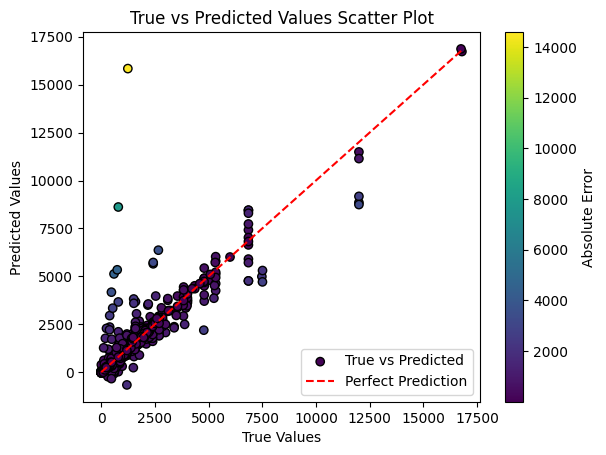

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Example true and predicted values
y_true = y_test
y_pred = preds_xgb

# Calculate the absolute error for each point
errors = np.abs(y_true - y_pred)

# Create a scatter plot with colors based on error
scatter = plt.scatter(y_true, y_pred, c=errors, cmap='viridis', edgecolor='k', label='True vs Predicted')

# Add labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values Scatter Plot')

# Add a diagonal line for reference
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle='--', color='red', label='Perfect Prediction')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Absolute Error')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Ensemble learning

In [39]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 11.8 MB/s eta 0:00:00


Ensemble Model RMSE for each fold: [488.09702987 476.7799589  386.12223801 334.02329341 466.77256252]
Ensemble Model Mean RMSE: 430.3590165413551
Ensemble Model R2 for each fold: [0.87762434 0.88013657 0.92384776 0.94307225 0.89642788]
Ensemble Model Mean R2: 0.9042217620012598


[05:05:19] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[05:05:20] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


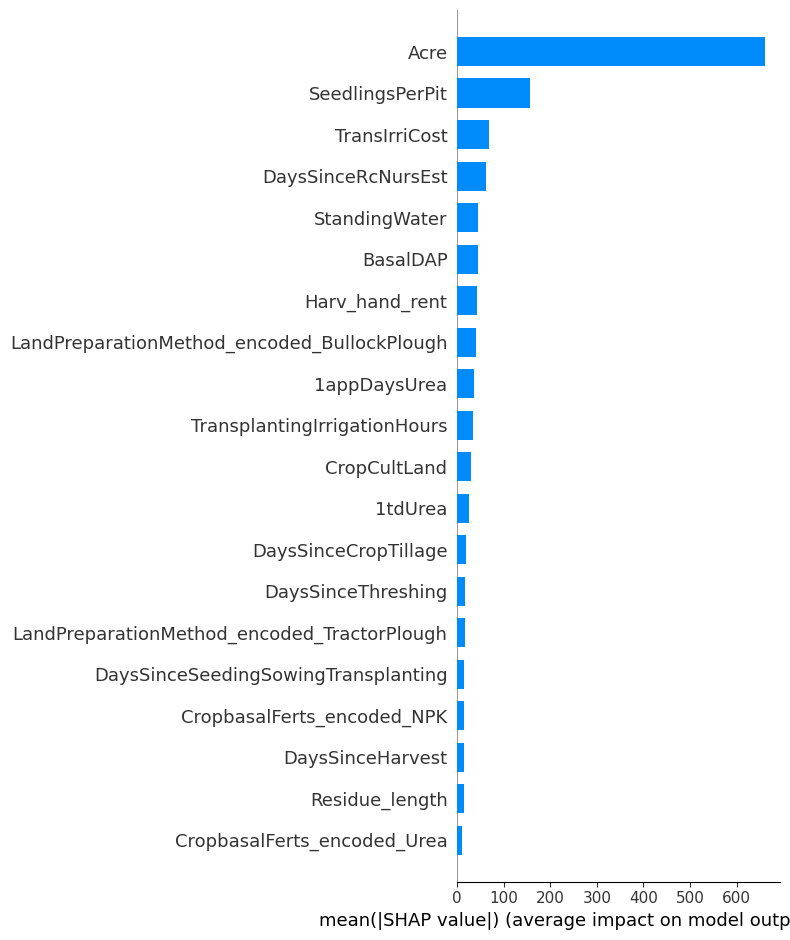

Ensemble Model RMSE on Test Data: 171.1807363560029
Ensemble Model R2 on Test Data: 0.9736444765296046


In [44]:
from sklearn.ensemble import VotingRegressor
import shap
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
import numpy as np

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Split data for training and local testing
X = data_smogn.drop(['Yield', 'CultLand'], axis=1)
X = X.select_dtypes(include=np.number)
y = data_smogn['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)
# Create an ensemble model
ensemble_model = VotingRegressor([('random_forest', model), ('xgboost', model_xgb)])

# Cross-validation with RMSE and R2 as scoring metrics
cv_rmse_ensemble = cross_val_score(ensemble_model, X_train, y_train, cv=5, scoring=make_scorer(rmse))
cv_r2_ensemble = cross_val_score(ensemble_model, X_train, y_train, cv=5, scoring='r2')

# Print RMSE for each fold
print("Ensemble Model RMSE for each fold:", cv_rmse_ensemble)
# Calculate mean RMSE across all folds
mean_rmse_ensemble = np.mean(cv_rmse_ensemble)
print("Ensemble Model Mean RMSE:", mean_rmse_ensemble)

# Print R2 for each fold
print("Ensemble Model R2 for each fold:", cv_r2_ensemble)
# Calculate mean R2 across all folds
mean_r2_ensemble = np.mean(cv_r2_ensemble)
print("Ensemble Model Mean R2:", mean_r2_ensemble)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Explain the ensemble model's predictions using SHAP values
explainer_rf = shap.Explainer(model)
shap_values_rf = explainer_rf.shap_values(X_test)

explainer_xgb = shap.Explainer(model_xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test)

shap_values_ensemble = 0.5 * (shap_values_rf + shap_values_xgb)
# Summarize the effects of all the features
shap.summary_plot(shap_values_ensemble, X_test, plot_type="bar", feature_names=X.columns)

# Make predictions using the ensemble model
preds_ensemble = ensemble_model.predict(X_test)

# Measure the performance of the ensemble model
rmse_ensemble = mean_squared_error(y_test, preds_ensemble, squared=False)
print("Ensemble Model RMSE on Test Data:", rmse_ensemble)
r2_ensemble = r2_score(y_test, preds_ensemble)
print("Ensemble Model R2 on Test Data:", r2_ensemble)

[01:23:57] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


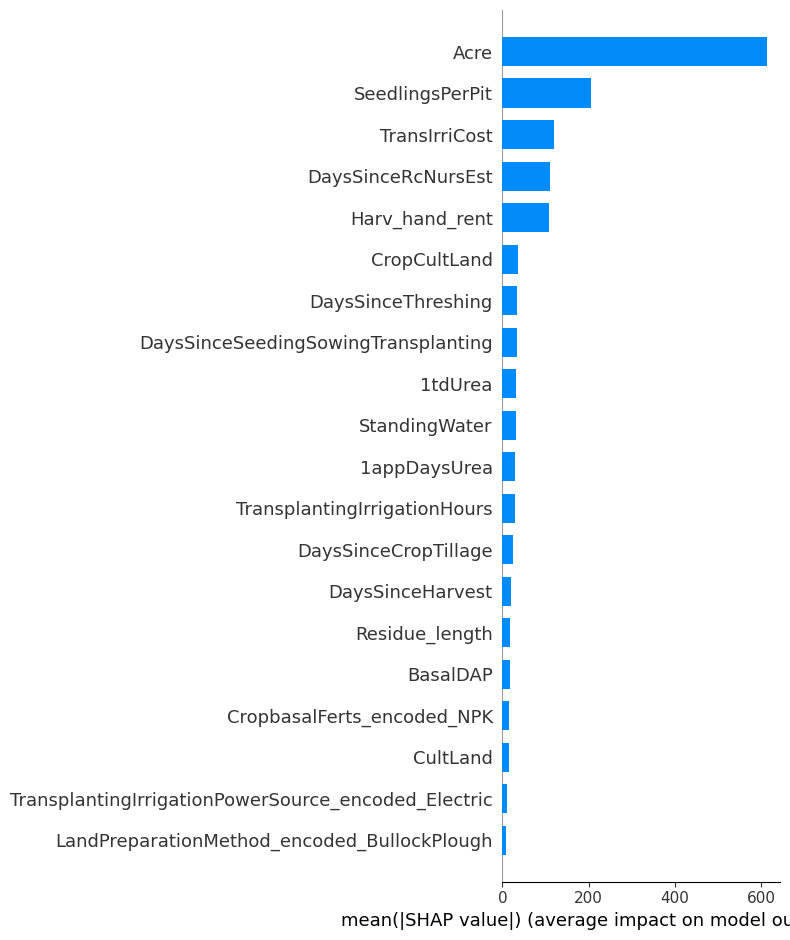

Ensemble Model RMSE: 473.8604215404313
R2 Score: 0.8258313432310885


In [44]:
from sklearn.ensemble import VotingRegressor
import shap

# Create an ensemble model
ensemble_model = VotingRegressor([('random_forest', model), ('xgboost', model_xgb)])

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Explain the ensemble model's predictions using SHAP values
explainer_rf = shap.Explainer(model)
shap_values_rf = explainer_rf.shap_values(X_test)

explainer_xgb = shap.Explainer(model_xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test)

shap_values_ensemble = 0.5 * (shap_values_rf + shap_values_xgb)
# Summarize the effects of all the features
shap.summary_plot(shap_values_ensemble, X_test, plot_type="bar", feature_names=X.columns)

# Make predictions using the ensemble model
preds_ensemble = ensemble_model.predict(X_test)

# Measure the performance of the ensemble model
rmse_ensemble = mean_squared_error(y_test, preds_ensemble, squared=False)
print("Ensemble Model RMSE:", rmse_ensemble)
r2 = r2_score(y_test, preds_ensemble)
print("R2 Score:", r2)

In [45]:
test = test.select_dtypes(include=np.number)
final_preds = ensemble_model.predict(test)
final_preds

array([526.90434509, 390.61691284, 477.59663452, ..., 204.94454132,
       369.42546021, 346.32945374])

In [46]:
df_preds = pd.DataFrame(final_preds, columns=['Predictions'])
test_id = pd.read_csv(data_path + 'Test.csv')
test_id = test_id['ID']
df_preds = pd.concat([test_id,df_preds], axis=1)
df_preds.head()
df_preds.to_csv('/content/drive/MyDrive/CSCI461/submission3_KM.csv', index = False)

# More explainability

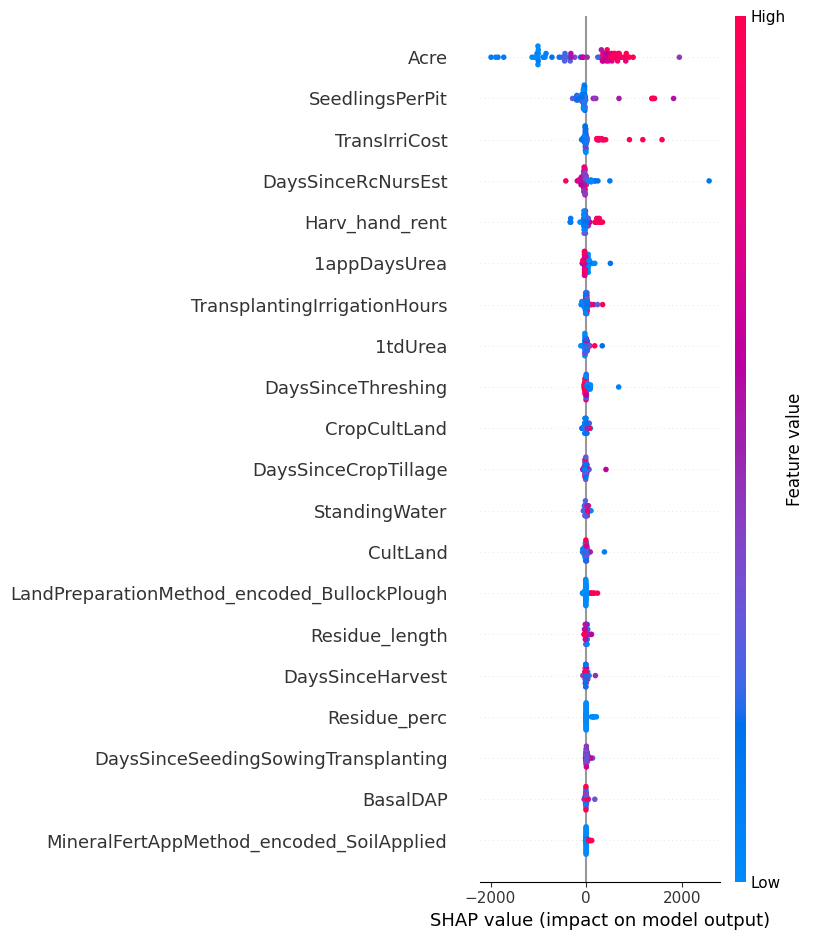

In [44]:
shap.summary_plot(shap_values_ensemble, X_test, feature_names=X.columns, show=False)
plt.savefig('shap_beeswarm_plot.png', format='png')

# Show the plot
plt.show()

A dependence plot is a scatter plot that shows the effect of a single feature on the predictions made by the model. In this example, the property value increases significantly when the average number of rooms per dwelling is higher than 6.

Each dot is a single prediction (row) from the dataset.
The x-axis is the actual value from the dataset.
The y-axis is the SHAP value for that feature, which represents how much knowing that feature value changes the output of the model for that prediction.
The color corresponds to a second feature that may have an interaction effect with the feature we are plotting (by default this second feature is chosen automatically). If an interaction effect is present between this other feature and the feature we are plotting it will show up as a distinct vertical pattern of coloring.

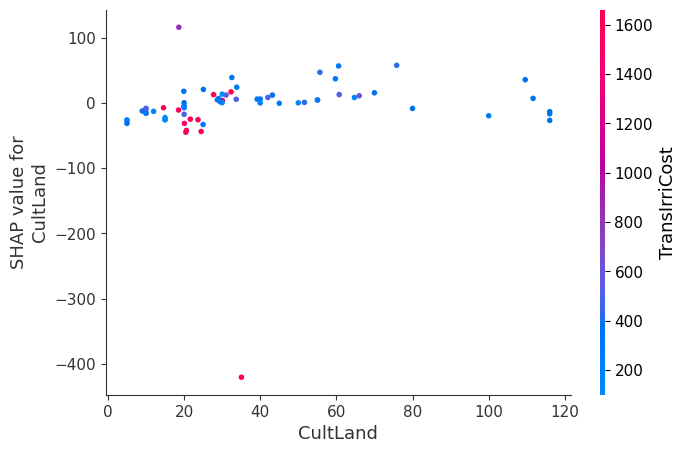

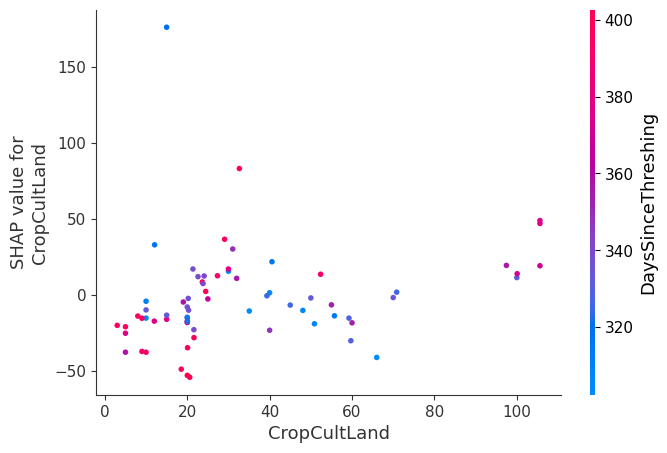

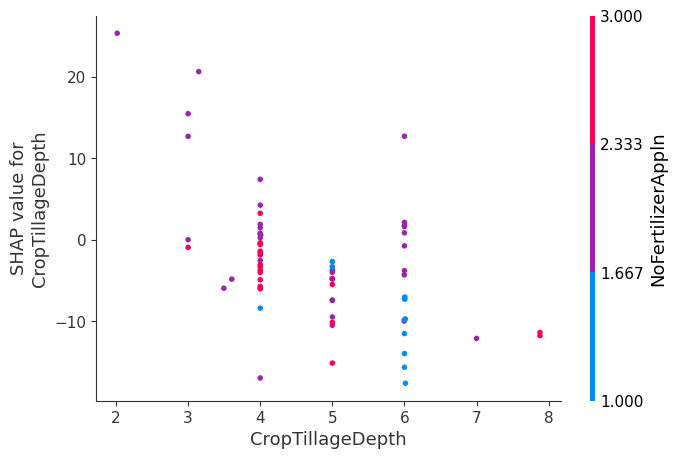

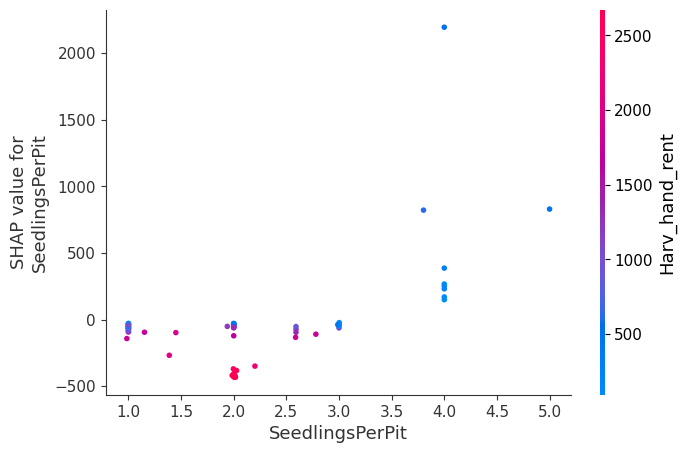

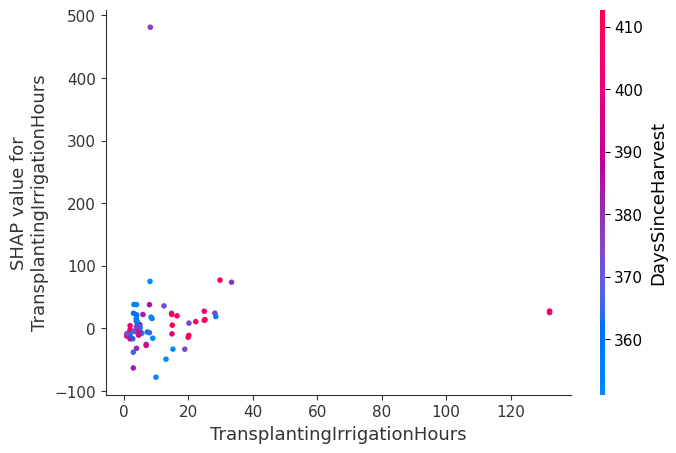

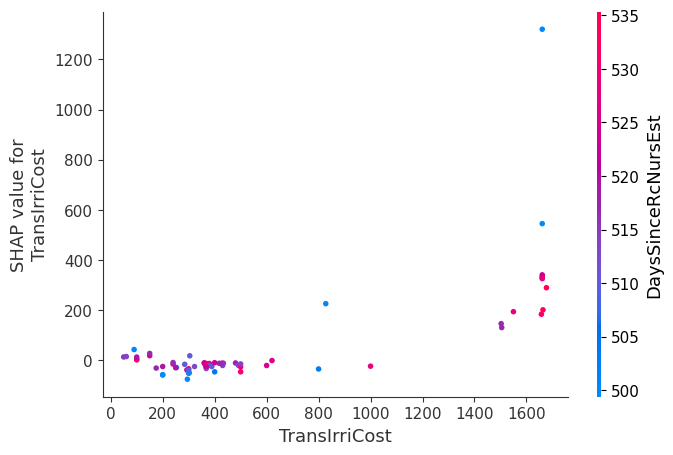

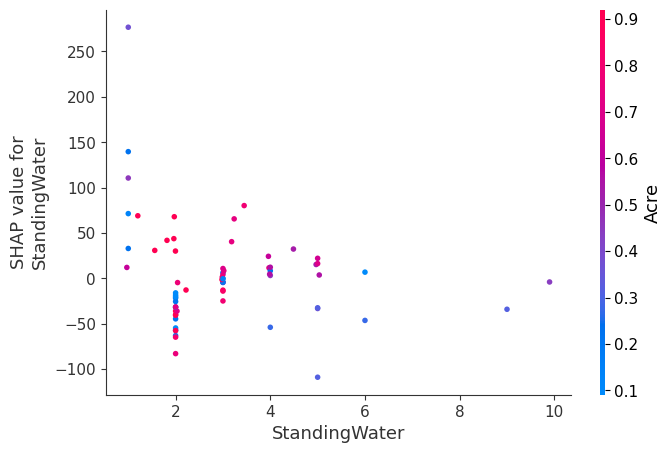

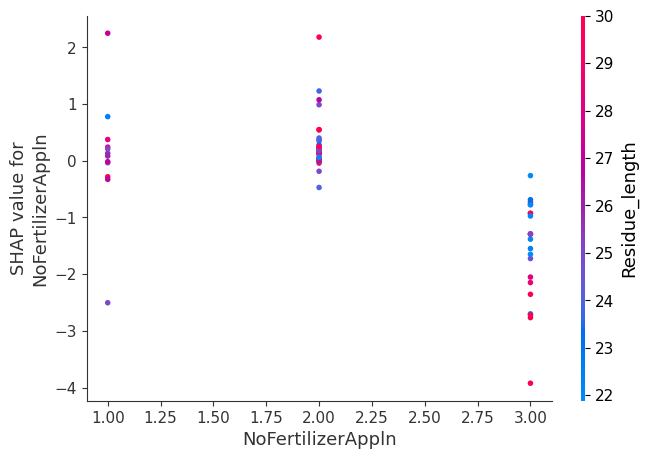

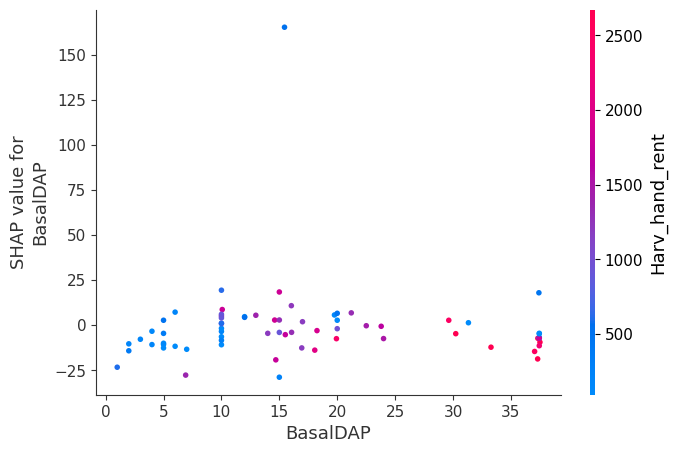

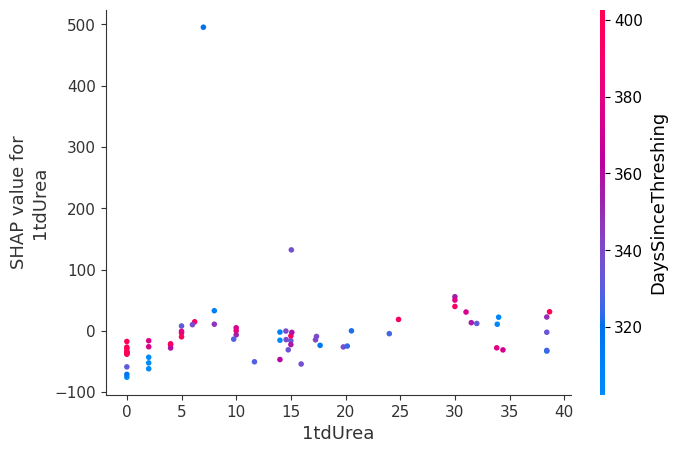

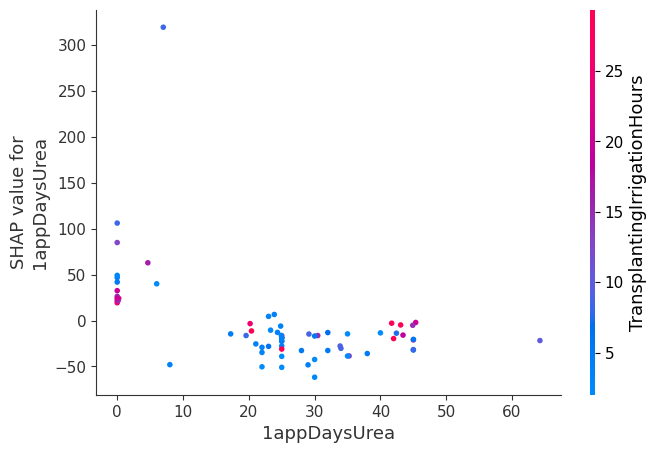

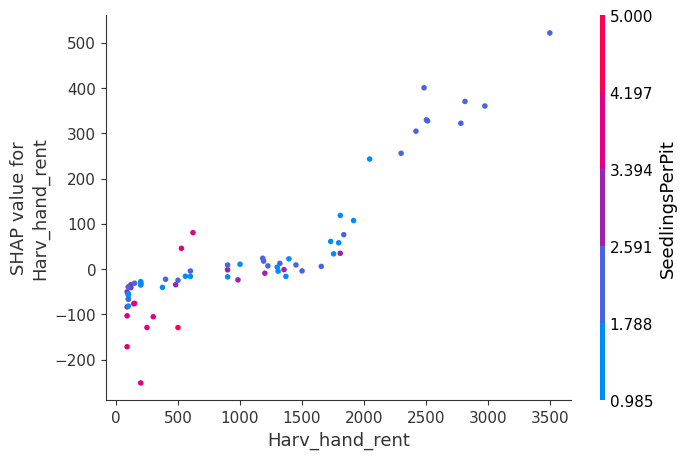

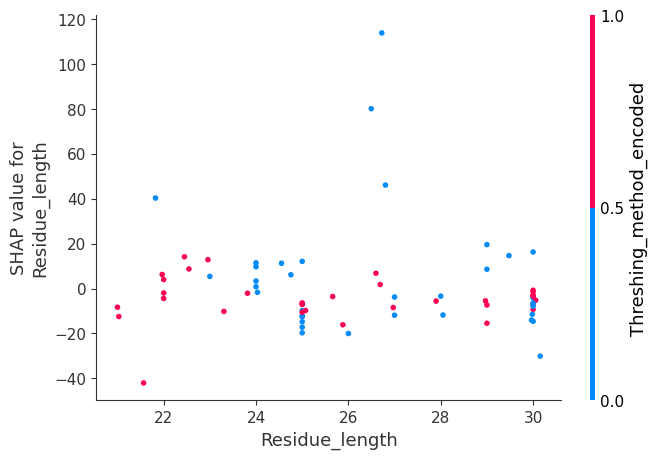

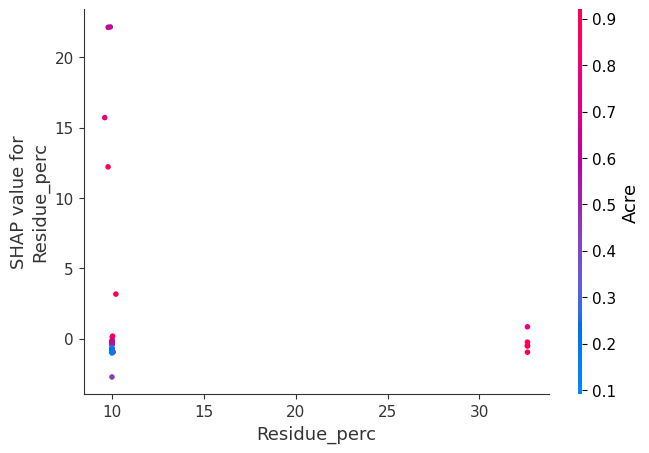

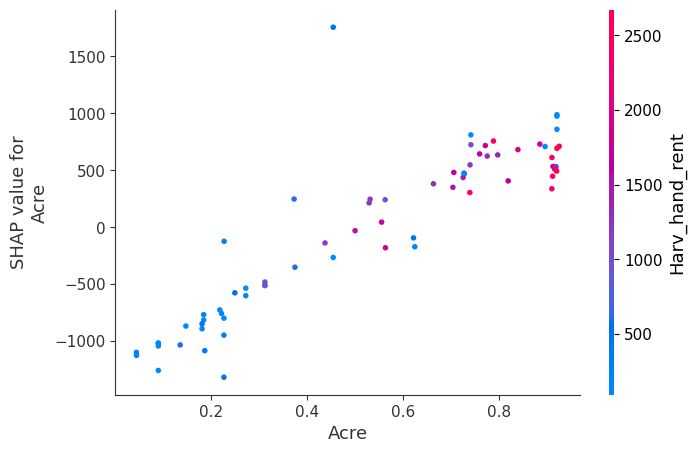

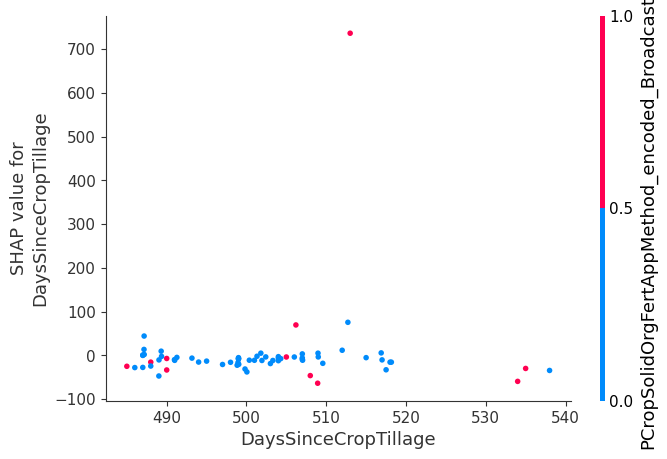

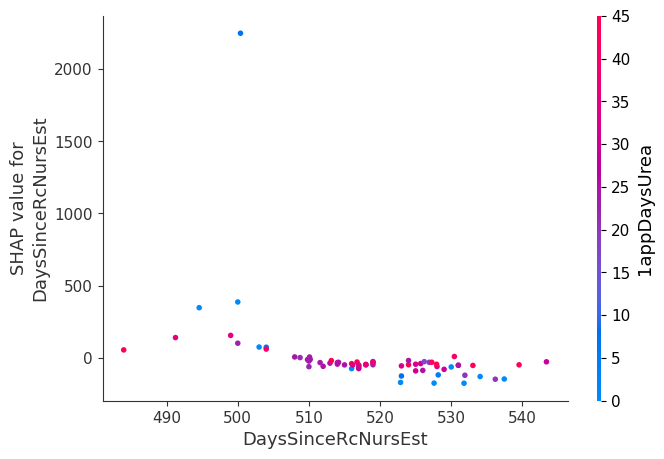

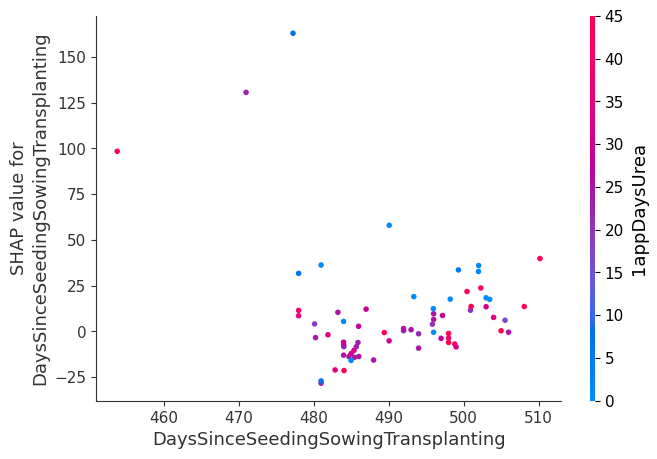

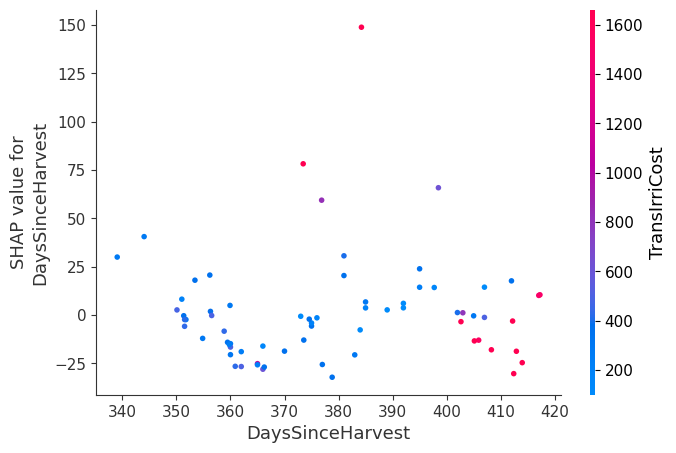

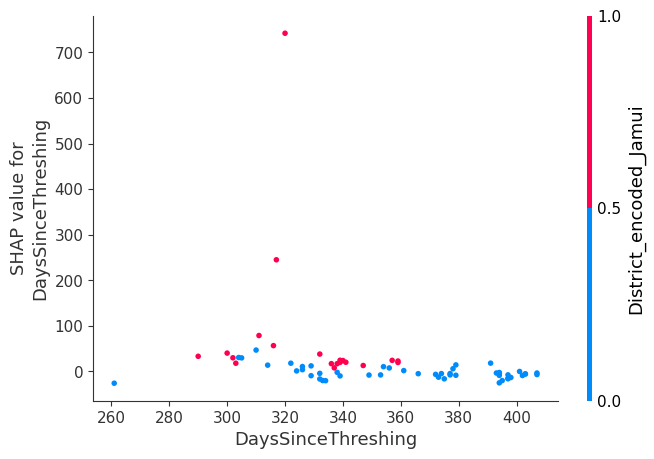

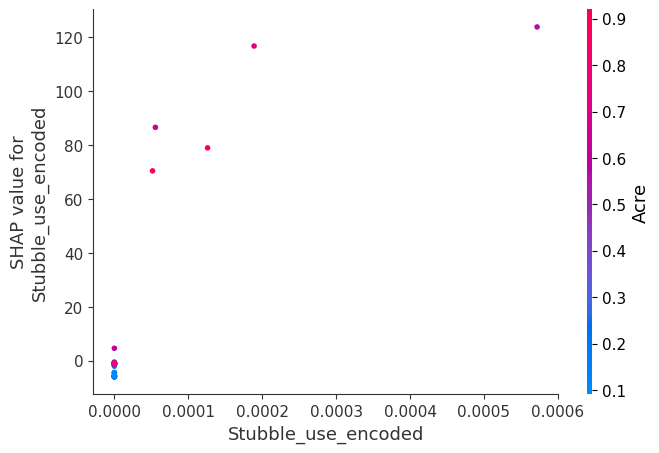

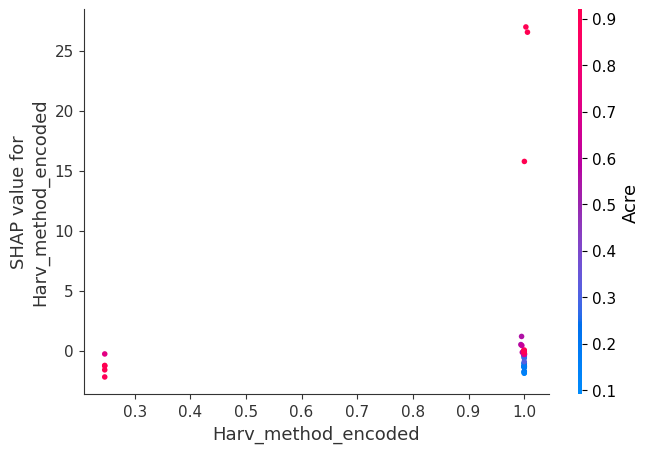

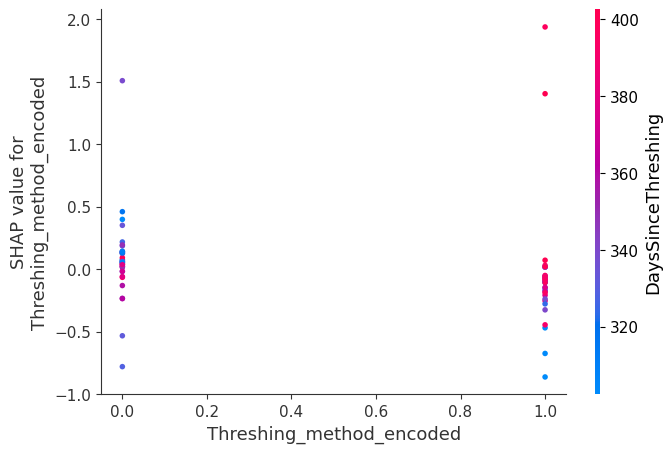

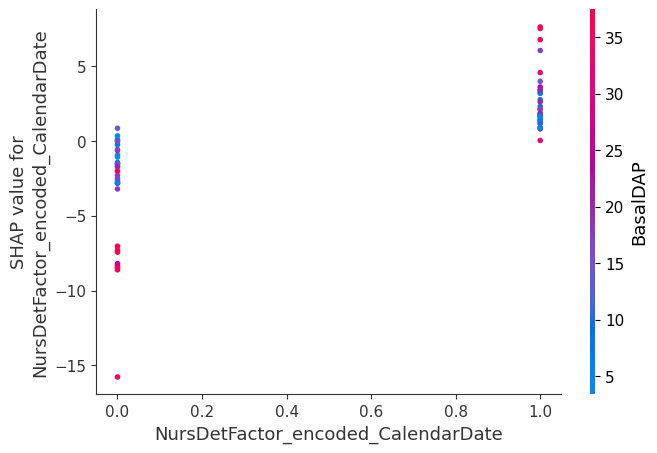

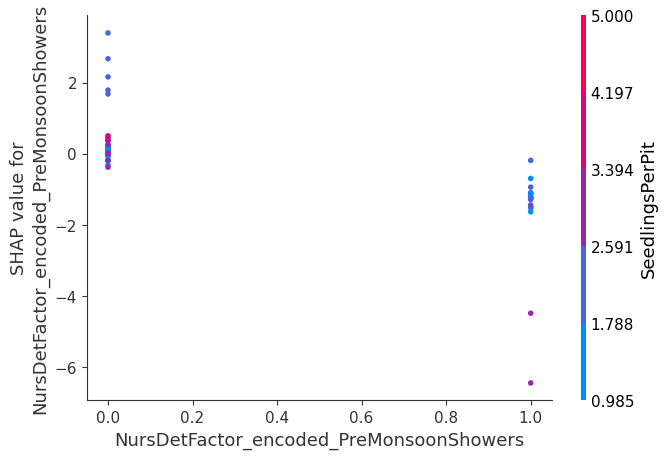

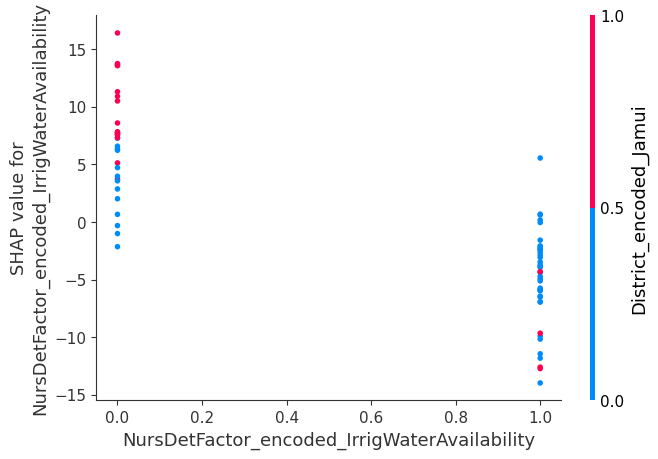

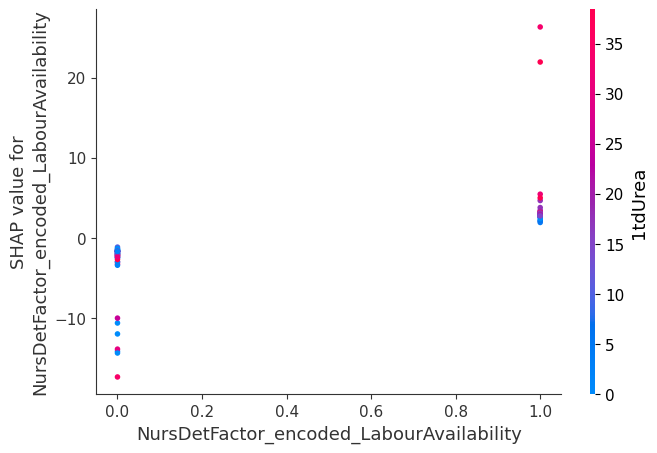

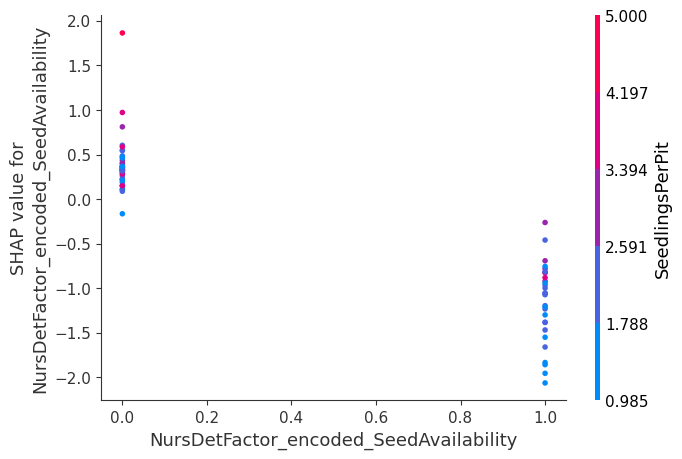

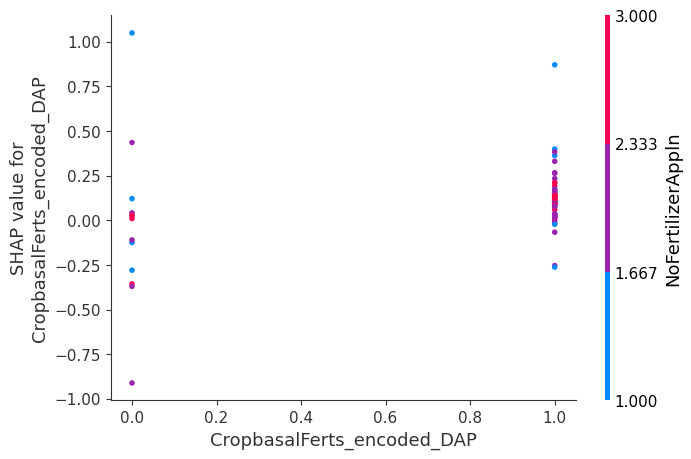

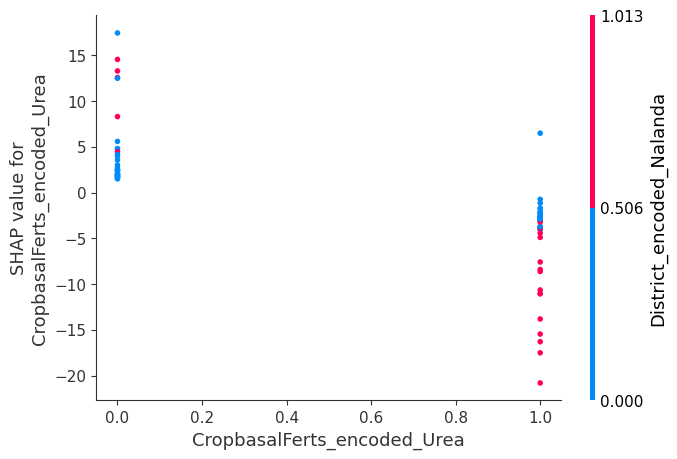

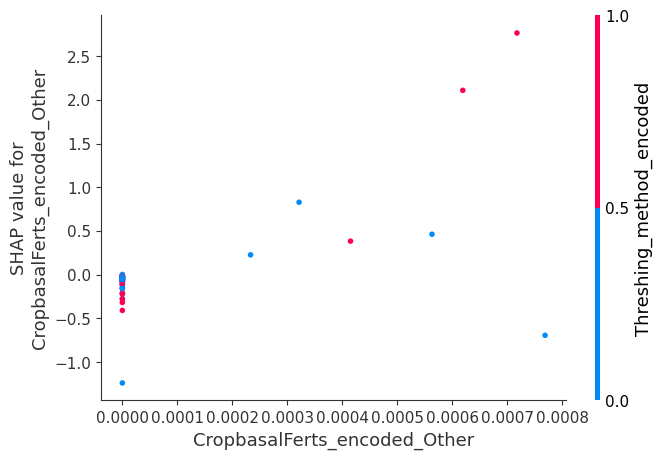

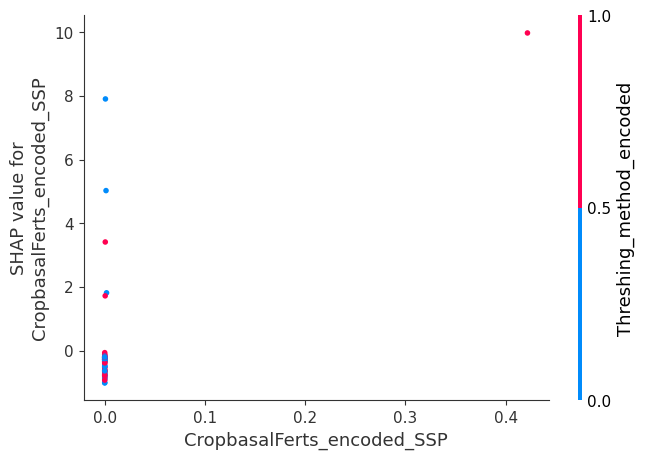

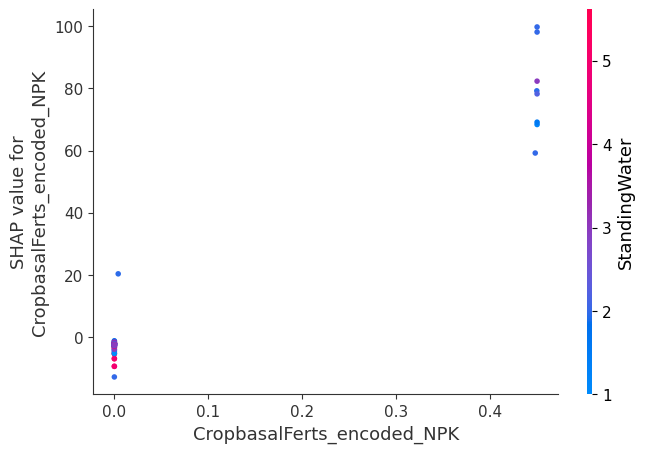

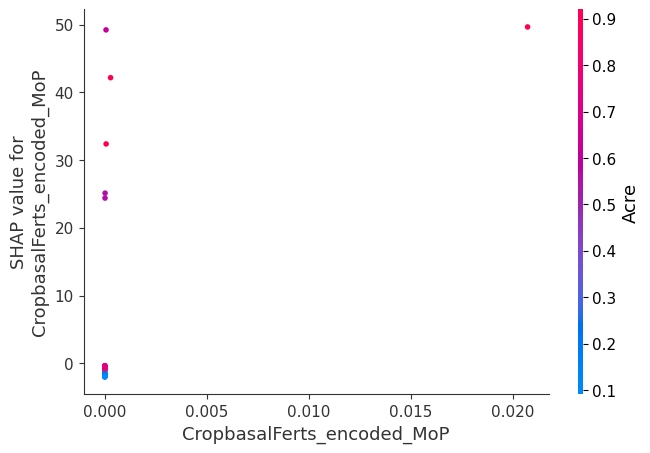

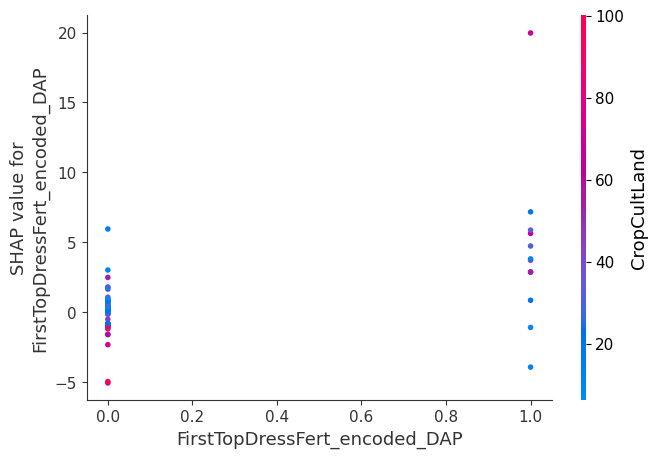

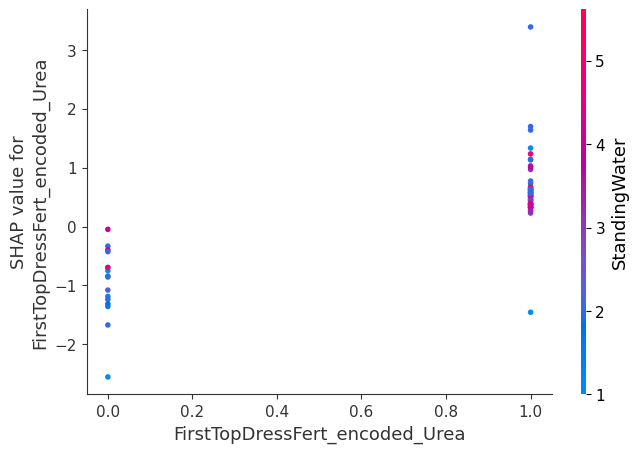

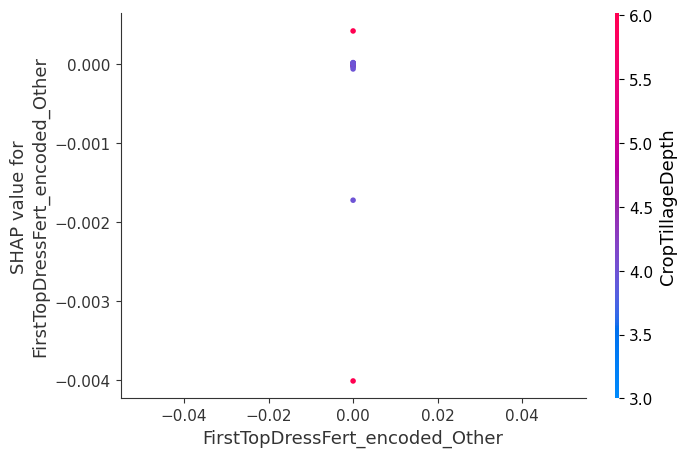

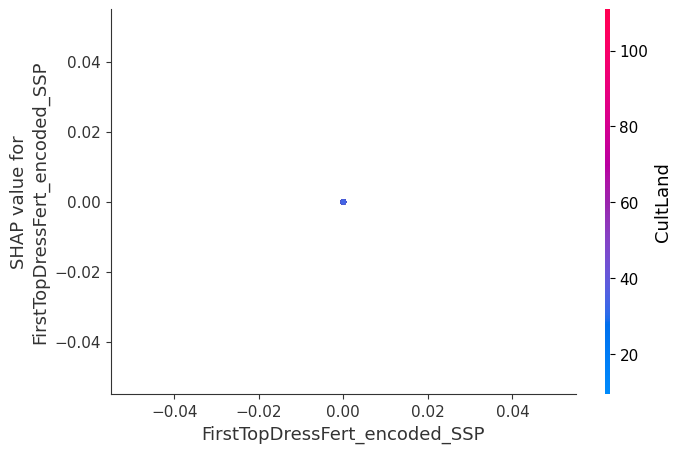

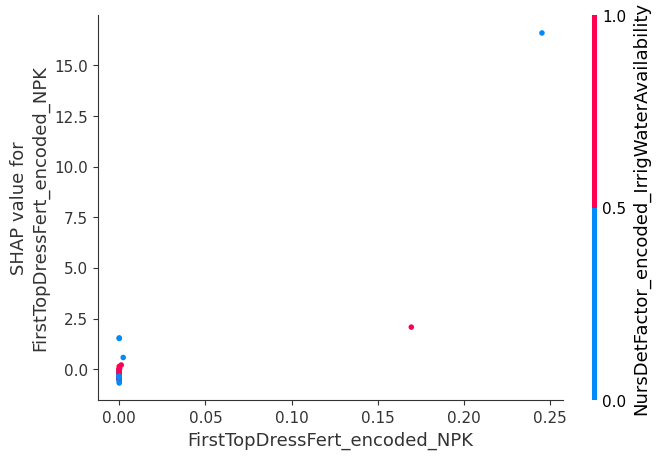

KeyboardInterrupt: ignored

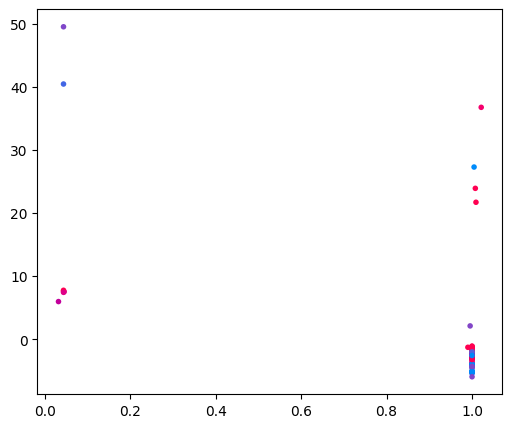

In [ ]:
for i in range(len(X.columns)):
  shap.dependence_plot(i, shap_values_ensemble, X_test, feature_names=X.columns)

# SVM

In [48]:
# Split data for training and local testing
X = data_smogn.drop(['Yield'], axis=1)
X = X.select_dtypes(include=np.number)
y = data_smogn['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto','scale'],
              'kernel': ['rbf','sigmoid']}

from sklearn.model_selection import GridSearchCV
model = SVR()
#grid = GridSearchCV(rf,param_grid=grid_space,cv=5,scoring='accuracy')
grid = GridSearchCV(estimator=model, param_grid = param_grid, cv = 5, refit = True, verbose = 1)

model_grid = grid.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",model_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",model_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",model_grid.best_params_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 SVR(C=1000, gamma=0.0001)

 The best score across ALL searched params:
 0.6545025276077338

 The best parameters across ALL searched params:
 {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [49]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
import numpy as np

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Instantiate SVM model (SVR)
model_svm = SVR(C=1000, gamma=0.0001)

# Cross-validation with RMSE and R2 as scoring metrics
cv_rmse = cross_val_score(model_svm, X_train, y_train, cv=5, scoring=make_scorer(rmse))
cv_r2 = cross_val_score(model_svm, X_train, y_train, cv=5, scoring='r2')

# Print RMSE for each fold
print("SVM RMSE for each fold:", cv_rmse)
# Calculate mean RMSE across all folds
mean_rmse = np.mean(cv_rmse)
print("SVM Mean RMSE:", mean_rmse)

# Print R2 for each fold
print("SVM R2 for each fold:", cv_r2)
# Calculate mean R2 across all folds
mean_r2 = np.mean(cv_r2)
print("SVM Mean R2:", mean_r2)

SVM RMSE for each fold: [866.23374632 858.87294992 856.35776503 751.62156156 858.66749127]
SVM Mean RMSE: 838.3507028182178
SVM R2 for each fold: [0.6419235  0.62149053 0.64343397 0.70117695 0.66448768]
SVM Mean R2: 0.6545025276077338


# Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
import numpy as np

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Split data for training and local testing
X = data_smogn.drop(['Yield'], axis=1)
X = X.select_dtypes(include=np.number)
y = data_smogn['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

# Instantiate Linear Regression model
model_lr = LinearRegression()

# Cross-validation with RMSE and R2 as scoring metrics
cv_rmse = cross_val_score(model_lr, X_train, y_train, cv=5, scoring=make_scorer(rmse))
cv_r2 = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='r2')

# Print RMSE for each fold
print("Linear Regression RMSE for each fold:", cv_rmse)
# Calculate mean RMSE across all folds
mean_rmse = np.mean(cv_rmse)
print("Linear Regression Mean RMSE:", mean_rmse)

# Print R2 for each fold
print("Linear Regression R2 for each fold:", cv_r2)
# Calculate mean R2 across all folds
mean_r2 = np.mean(cv_r2)
print("Linear Regression Mean R2:", mean_r2)

Linear Regression RMSE for each fold: [1082.15875702 1040.07278438 1012.72992425  962.11100593 1185.04648543]
Linear Regression Mean RMSE: 1056.4237914016276
Linear Regression R2 for each fold: [0.43436767 0.40315219 0.44548287 0.44460207 0.41256859]
Linear Regression Mean R2: 0.4280346797915534


# Other Notebook Links which we have also worked on but did not give favourable results



1.   ANN and CNN - https://colab.research.google.com/drive/1m11UgG2nxOChBhTiu1QAwwryxcCGvSpv?usp=sharing
2.   Some other ML models and their testing - https://colab.research.google.com/drive/1vWijdDY3g7y_t2Kzx1OslDaG8T0tW5Ba?authuser=3


